In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams["font.size"] = 24
import glob
import sdf
import tqdm
from scipy.integrate import quad
from epoch_viz.viz import EpochViz

In [2]:
font = {
        'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
    }

In [3]:
def prepare(p):
    c = 3*1e8
    e = 1.6*1e-19
    m=9.1*1e-31
    lambda0 = 1e-6
    tau=lambda0/c
    las_time = 20*tau
    omega0 = 2*np.pi*c/lambda0
    Er = m * omega0 * c / e
    nx = 16000
    t_end =40*tau
    dt_snapshot = 0.08e-15
    x_min = -20*lambda0
    x_max = 20*lambda0
    factor =4
    epsilon = 8.85418782e-12
    nc = epsilon*m*omega0**2/e**2
    n0 = factor*nc


    las_time = 20
    DIR = f"SG_{p}"


    def super_gaus(t,p):
        mu=las_time/2
        sigma=las_time*0.15
        n = (t-mu)**p
        d = sigma**p
        e_0 = np.sin(2*np.pi*t)
        res = np.exp(-n/d)*e_0
        return res
    
    ez = EpochViz(DIR) 

    samples = len(ez.files)
    t_max = las_time
    t = np.linspace(0, t_max, samples)
    t2 = np.linspace(0, 2*t_max, samples)


    Ey,T,X = ez.load_data(['Ey'],
    normalize=False,
    space_range=[0, 8000],
    time_range=None,
    overwrite=True,
    return_data=True
        ) 
    omega, fy = ez.plot_fft(node = 8000, return_data=True, show_fig=False)
    return omega, fy


Loading Data...: 100%|██████████| 1669/1669 [00:03<00:00, 425.03it/s]
/tmp/ipykernel_5951/438092580.py:14: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(24)
/tmp/ipykernel_5951/438092580.py:16: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(24)


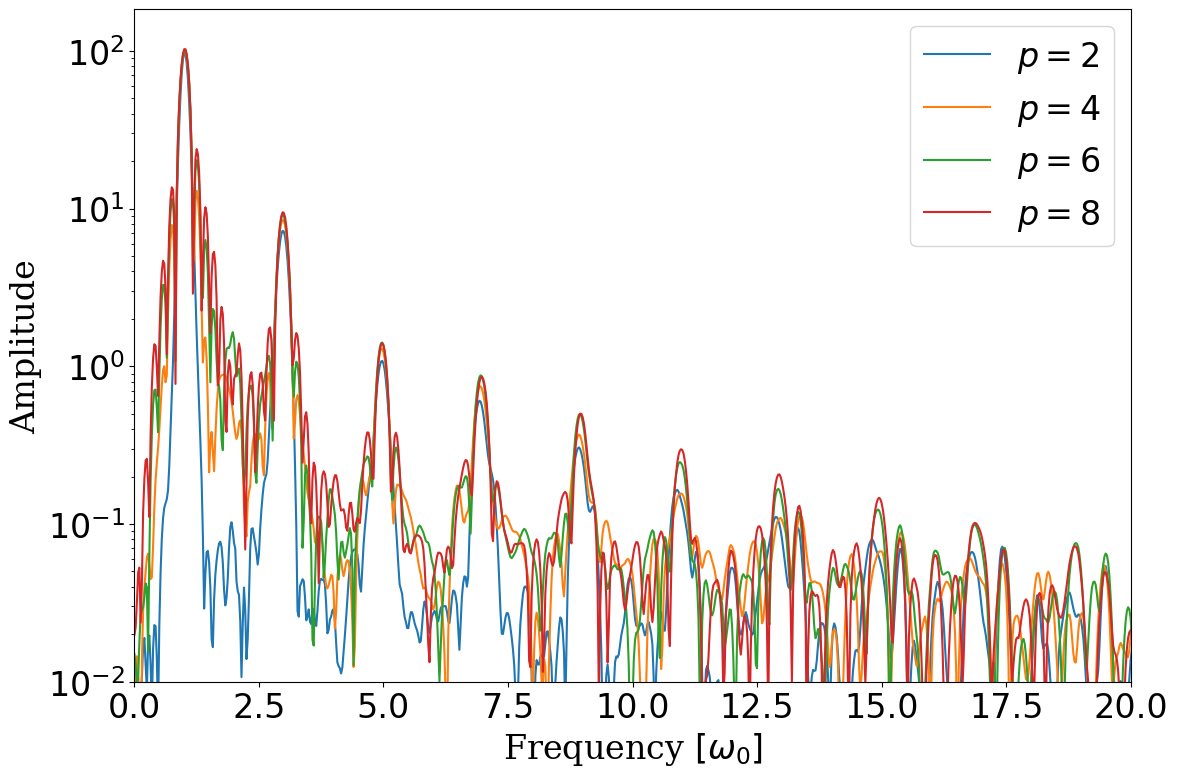

In [4]:
plt.figure()
ps = [2, 4, 6, 8]
# ps = [2]

for p in ps:
    omega, fy = prepare(p)
    plt.plot(omega, fy, label=f'$p={p}$')
    plt.xlabel(r'Frequency $[\omega_0]$', fontdict=font)
    plt.ylabel(r'Amplitude', fontdict=font)
    plt.yscale('log')
    plt.xlim(0, 20)
    plt.ylim(1e-2, )
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(24)
plt.legend(fontsize = 24)
plt.tight_layout()
plt.savefig(f"images/SG_ffts_2-8.png", dpi=300)